In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA

In [15]:
pip install xlrd

     |████████████████████████████████| 96 kB 6.6 MB/s 
Note: you may need to restart the kernel to use updated packages.


In [22]:
df = pd.read_excel("default_of_credit_card_clients.xls",header = 1)

In [25]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


1. **ID**, the ID number assigned to each customer
2. **LIMIT_BAL**, Credit limit
3. **SEX**, Gender
4. **EDUCATION**, Level of education
5. **MARRIGE**, Marital status
6. **AGE**, Age
7. **PAY_**, When the last 6 bills were paid
8. **BILL_AMT** What the last 6 bills were
9. **PAY_AMT** How much the last payments were
20. **default payment next month**, what we want to predict

In [26]:
df.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [28]:
df.rename({'default payment next month':'DEFAULT'}, axis= 'columns', inplace=True)

In [29]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [30]:
df.drop("ID", axis = 1, inplace=True)

In [31]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:

- X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
- X2: Gender (1 = male; 2 = female).
- X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
- X4: Marital status (1 = married; 2 = single; 3 = others).
- X5: Age (year).
- X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows:
    - X6 = the repayment status in September, 2005; 
    - X7 = the repayment status in August, 2005; . . .;
    - X11 = the repayment status in April, 2005. 

The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
- X12-X17: Amount of bill statement (NT dollar).
    - X12 = amount of bill statement in September, 2005; 
    - X13 = amount of bill statement in August, 2005; . . .;
    - X17 = amount of bill statement in April, 2005.
- X18-X23: Amount of previous payment (NT dollar). 
    - X18 = amount paid in September, 2005; 
    - X19 = amount paid in August, 2005; . . .;
    - X23 = amount paid in April, 2005.

In [32]:
df['SEX'].unique()

array([2, 1])

In [33]:
df['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0])

In [35]:
df['MARRIAGE'].unique()

array([1, 2, 3, 0])

In [41]:
df.loc[(df['EDUCATION'] == 0) | (df['MARRIAGE'] == 0)]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
218,110000,2,3,0,31,0,0,0,0,0,...,73315,63818,63208,4000,5000,3000,3000,3000,8954,0
809,160000,2,2,0,37,0,0,0,0,0,...,28574,27268,28021,35888,1325,891,1000,1098,426,0
820,200000,2,3,0,51,-1,-1,-1,-1,0,...,780,390,390,0,390,780,0,390,390,0
1019,180000,2,3,0,45,-1,-1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
1443,200000,1,3,0,51,-1,-1,-1,-1,0,...,2529,1036,4430,5020,9236,2529,0,4430,6398,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28602,200000,2,3,0,37,1,-1,-1,-1,-1,...,4000,22800,5716,35000,5000,4000,22800,5716,0,0
28603,110000,2,3,0,44,2,2,2,2,2,...,41476,42090,43059,2000,2000,1700,1600,1800,1800,1
28766,80000,2,3,0,40,2,2,3,2,-1,...,1375,779,5889,5000,0,0,885,5889,4239,0
29078,100000,2,3,0,56,1,2,0,0,2,...,31134,30444,32460,0,1500,2700,0,2400,0,0


In [43]:
round(len(df.loc[(df['EDUCATION'] == 0) | (df['MARRIAGE'] == 0)])/ len(df) *100,2)

0.23

In [44]:
df_no_missing = df.loc[(df['EDUCATION'] != 0) & (df['MARRIAGE'] != 0)]

In [45]:
len(df_no_missing)

29932

### DOWN SAMPLE THE DATA

In [46]:
df_no_default = df_no_missing[df_no_missing["DEFAULT"] == 0]
df_default = df_no_missing[df_no_missing["DEFAULT"] == 1]

In [47]:
df_no_default_downsampled = resample(df_no_default,
                                    replace = False,
                                    n_samples = 1000,
                                    random_state = 42

)
len(df_no_default_downsampled)

1000

In [49]:
df_default_downsampled =  resample(df_default,
                                replace = False,
                                n_samples = 1000,
                                random_state = 42)
len(df_default_downsampled)

1000

In [50]:
df_downsampled = pd.concat([df_default_downsampled, df_no_default_downsampled])
len(df_downsampled)

2000

In [51]:
df_downsampled.tail()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
18942,150000,2,1,1,31,-1,-1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
29836,180000,1,6,1,34,-2,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
19424,90000,2,1,2,33,-1,-1,-1,-1,-1,...,3000,3000,3000,6000,0,3000,3000,3000,3000,0
25593,120000,2,3,1,38,0,0,0,0,0,...,119719,118042,120682,5720,5820,5670,4250,4450,4470,0
5859,20000,1,1,2,27,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0


In [52]:
X = df_downsampled.drop("DEFAULT", axis = 1).copy()

In [54]:
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
19982,300000,2,1,1,47,3,2,2,2,2,...,5000,5000,5000,5000,0,0,0,0,0,0
19350,80000,2,2,2,36,2,0,0,-2,-2,...,0,0,0,0,1700,0,0,0,0,0
17057,30000,2,3,2,22,2,2,0,0,0,...,29047,29507,11609,11711,0,1687,1147,524,400,666
26996,80000,1,1,2,34,2,2,2,2,2,...,63827,64682,65614,67007,2800,3000,2500,2600,2600,2600
23621,210000,2,3,1,44,-2,-2,-2,-2,-2,...,17706,0,5646,14793,13462,17706,0,5646,14793,7376


In [53]:
y = df_downsampled['DEFAULT'].copy()

In [55]:
y.head()

19982    1
19350    1
17057    1
26996    1
23621    1
Name: DEFAULT, dtype: int64

In [62]:
X_encoded = pd.get_dummies(X,columns = ['SEX',
                        'EDUCATION',
                        'MARRIAGE',
                        'PAY_0',
                        'PAY_2',
                        'PAY_3',
                        'PAY_4',
                        'PAY_5',
                        'PAY_6'])

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)
### Radial Basic Function for SVM assumes that the data are centered and scaled. (Each column have mean = 0, std = 1)

## Build the Preliminary SVM

In [66]:
clf_svm = SVC(random_state=42)
clf_svm.fit(X_train_scaled, y_train)

SVC(random_state=42)

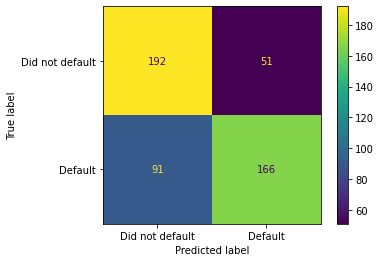

In [67]:
plot_confusion_matrix(clf_svm,
                    X_test_scaled,
                    y_test,
                    values_format = 'd',
                    display_labels = ['Did not default','Default'])

### Cross Validation and GridSearchCV


In [72]:
param_grid = [
    {
        'C': [0.5, 1, 10, 100],
        'gamma': ['scale', 1, 0.1, 0.01, 0.001, 0.0001],
        'kernel': ['rbf']
    },
]
optimal_params = GridSearchCV(
        SVC(),
        param_grid,
        cv = 5, 
        scoring = 'accuracy',
        verbose = 0
)
optimal_params.fit(X_train_scaled, y_train)
print(optimal_params.best_params_)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


## Building Final Model

In [78]:
clf_svm = SVC(random_state=42, C = 100, gamma=0.01)
clf_svm.fit(X_train_scaled, y_train)

SVC(C=100, gamma=0.01, random_state=42)

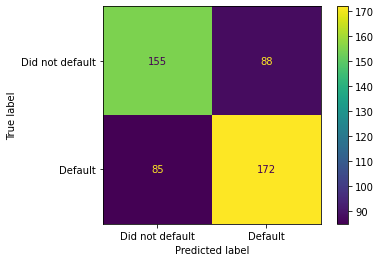

In [79]:
plot_confusion_matrix(clf_svm,
                    X_test_scaled,
                    y_test,
                    values_format = 'd',
                    display_labels = ['Did not default','Default'])

In [80]:
len(df_downsampled.columns)

24

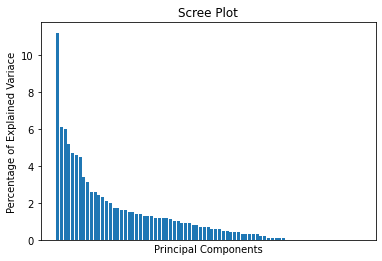

In [86]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = [str(x) for x in range(1, len(per_var)+1)]
plt.bar(x=range(1,len(per_var)+1), height=per_var)
plt.tick_params(
    axis='x',
    which = 'both',
    bottom = False,
    top = False,
    labelbottom = False
)
plt.ylabel("Percentage of Explained Variace")
plt.xlabel('Principal Components')
plt.title('Scree Plot')
plt.show()

In [90]:
train_pc1_coords = X_train_pca[:,0]
train_pc2_coords = X_train_pca[:,1]

pca_train_scale = scale(np.column_stack((train_pc1_coords, train_pc2_coords)))

param_grid = [
    {
        'C': [1, 10, 100, 1000],
        'gamma': [ 1, 0.1, 0.01, 0.001, 0.0001],
        'kernel': ['rbf']
    },
]
optimal_params = GridSearchCV(
        SVC(),
        param_grid,
        cv = 5, 
        scoring = 'accuracy',
        verbose = 0
)
optimal_params.fit(pca_train_scale, y_train)
print(optimal_params.best_params_)

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}


In [89]:
clf_svm = SVC(random_state=42, C = 1000, gamma=0.001)
clf_svm.fit(X_train_scaled, y_train)

SVC(C=1000, gamma=0.001, random_state=42)

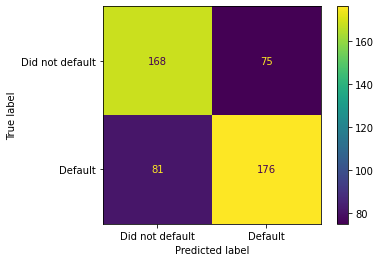

In [91]:
plot_confusion_matrix(clf_svm,
                    X_test_scaled,
                    y_test,
                    values_format = 'd',
                    display_labels = ['Did not default','Default'])